### (1) 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 하이퍼파라미터 튜닝, 훈련 데이터 앙상블 학습 과정, 교차 검증, 분석 결과 시각화 

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

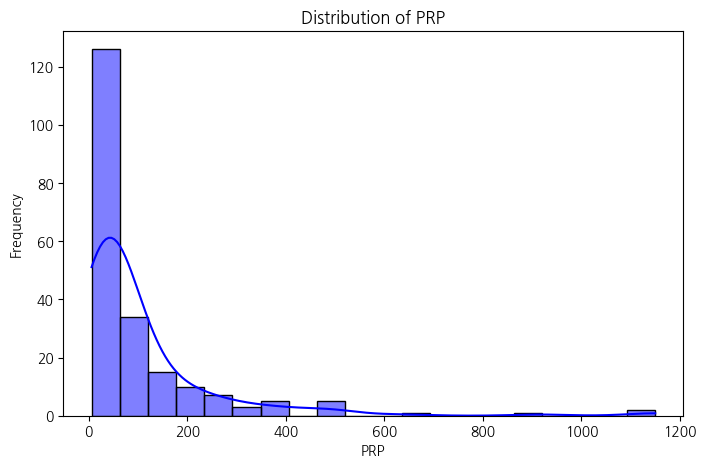

최고 모델 : Pipeline(steps=[('regression', RandomForestRegressor(n_estimators=50))])
Mean Squared Error (Train): 491.18804383561644
Mean Squared Error (Test): 2038.4604380952378
Mean Absolute Error (Train): 3.892054794520548
Mean Absolute Error (Test): 9.048571428571428
R² (Train): 0.9799497228858695
R² (Test): 0.9286954123579033

 앙상블 모델 성능 :
R² (Train, Ensemble): 0.9821269001866963
R² (Test, Ensemble): 0.9402019936607322


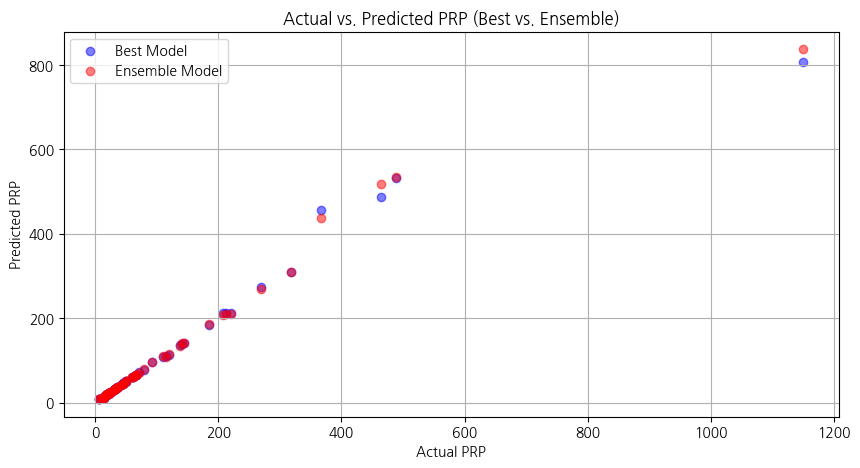

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dt = pd.read_csv('C:/Users/User/Desktop/빅데이터 3차 4차/machine.data_update.csv')
print(dt.head())  
print(dt.info())  

plt.figure(figsize=(8, 5))
sns.histplot(dt['PRP'], bins=20, kde=True, color='blue')
plt.title('Distribution of PRP')
plt.xlabel('PRP')
plt.ylabel('Frequency')
plt.show()

selected_features = dt.columns[2:9]
X = dt[selected_features]
y = dt['PRP']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

pipeline = Pipeline([
    ('regression', RandomForestRegressor())
])

param_grid = {
    'regression__n_estimators': [50, 100, 150],
    'regression__max_depth': [None, 10, 20],
    'regression__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

ensemble_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=10)
ensemble_model.fit(X_train, y_train)

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-1 * cv_scores)

y_hat_train = best_model.predict(X_train)
y_hat_test = best_model.predict(X_test)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
mae_train = mean_absolute_error(y_train, y_hat_train)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat_test)

print("최고 모델 :", best_model)
print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")
print(f"Mean Absolute Error (Train): {mae_train}")
print(f"Mean Absolute Error (Test): {mae_test}")
print(f"R² (Train): {r2_train}")
print(f"R² (Test): {r2_test}")

y_hat_train_ensemble = ensemble_model.predict(X_train)
y_hat_test_ensemble = ensemble_model.predict(X_test)
r2_train_ensemble = r2_score(y_train, y_hat_train_ensemble)
r2_test_ensemble = r2_score(y_test, y_hat_test_ensemble)

print("\n 앙상블 모델 성능 :")
print(f"R² (Train, Ensemble): {r2_train_ensemble}")
print(f"R² (Test, Ensemble): {r2_test_ensemble}")

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_hat_test, color='blue', alpha=0.5, label='Best Model')
plt.scatter(y_test, y_hat_test_ensemble, color='red', alpha=0.5, label='Ensemble Model')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs. Predicted PRP (Best vs. Ensemble)')
plt.legend()
plt.grid(True)
plt.show()


### (1) 단계에서 얻은 Pipeline 기반 모델 GridSearchCV의 best_estimator모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):

    y_hat_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_hat_train)
    mae_train = mean_absolute_error(y_train, y_hat_train)
    r2_train = r2_score(y_train, y_hat_train)

    print("훈련 데이터 평가 지표:")
    print(f"평균 제곱 오차 (MSE) - 훈련: {mse_train}")
    print(f"평균 절대 오차 (MAE) - 훈련: {mae_train}")
    print(f"결정 계수 (R²) - 훈련: {r2_train}")

    y_hat_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_hat_test)
    mae_test = mean_absolute_error(y_test, y_hat_test)
    r2_test = r2_score(y_test, y_hat_test)

    print("\n테스트 데이터 평가 지표:")
    print(f"평균 제곱 오차 (MSE) - 테스트: {mse_test}")
    print(f"평균 절대 오차 (MAE) - 테스트: {mae_test}")
    print(f"결정 계수 (R²) - 테스트: {r2_test}")

 
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-1 * cv_scores)

    print("\n교차 검증 평가 지표:")
    print(f"평균 RMSE (교차 검증): {rmse_scores.mean()}")

evaluate_model(best_model, X_train, y_train, X_test, y_test)


훈련 데이터 평가 지표:
평균 제곱 오차 (MSE) - 훈련: 491.18804383561644
평균 절대 오차 (MAE) - 훈련: 3.892054794520548
결정 계수 (R²) - 훈련: 0.9799497228858695

테스트 데이터 평가 지표:
평균 제곱 오차 (MSE) - 테스트: 2038.4604380952378
평균 절대 오차 (MAE) - 테스트: 9.048571428571428
결정 계수 (R²) - 테스트: 0.9286954123579033

교차 검증 평가 지표:
평균 RMSE (교차 검증): 29.17568094541022


### (3) (2) 단계에서 얻은 Pipeline 기반 GridSearchCV의 best_estimator모델의 테스트 데이터에 대해 예측 성능 R^2가 85% 이상이 나오도록 모델을 개선

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dt = pd.read_csv('C:/Users/User/Desktop/빅데이터 3차 4차/machine.data_update.csv')

selected_features = dt.columns[2:9]
X = dt[selected_features]
y = dt['PRP']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)


In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge = Ridge(alpha=1.0, random_state=10)

ridge.fit(X_train, y_train)


y_hat_train = ridge.predict(X_train)
mse_train = mean_squared_error(y_train, y_hat_train)
mae_train = mean_absolute_error(y_train, y_hat_train)
r2_train = r2_score(y_train, y_hat_train)
print("훈련 데이터 성능:")
print(f"평균 제곱 오차 (MSE): {mse_train}")
print(f"평균 절대 오차 (MAE): {mae_train}")
print(f"결정 계수 (R²): {r2_train}")

y_hat_test = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_hat_test)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_test = r2_score(y_test, y_hat_test)
print("\n테스트 데이터 성능:")
print(f"평균 제곱 오차 (MSE): {mse_test}")
print(f"평균 절대 오차 (MAE): {mae_test}")
print(f"결정 계수 (R²): {r2_test}")


훈련 데이터 성능:
평균 제곱 오차 (MSE): 8.662807291287988
평균 절대 오차 (MAE): 1.8879594070796217
결정 계수 (R²): 0.9996463845385561

테스트 데이터 성능:
평균 제곱 오차 (MSE): 14.550396332285073
평균 절대 오차 (MAE): 1.8223792721608791
결정 계수 (R²): 0.9994910325502946


In [14]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge = Ridge(alpha=1.0, random_state=10)

ridge.fit(X_train, y_train)

y_hat_train = ridge.predict(X_train)
mse_train = mean_squared_error(y_train, y_hat_train)
mae_train = mean_absolute_error(y_train, y_hat_train)
r2_train = r2_score(y_train, y_hat_train)
print("훈련 데이터 성능:")
print(f"평균 제곱 오차 (MSE): {mse_train}")
print(f"평균 절대 오차 (MAE): {mae_train}")
print(f"결정 계수 (R²): {r2_train}")


y_hat_test = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_hat_test)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_test = r2_score(y_test, y_hat_test)
print("\n테스트 데이터 성능:")
print(f"평균 제곱 오차 (MSE): {mse_test}")
print(f"평균 절대 오차 (MAE): {mae_test}")
print(f"결정 계수 (R²): {r2_test}")


훈련 데이터 성능:
평균 제곱 오차 (MSE): 8.662807291287988
평균 절대 오차 (MAE): 1.8879594070796217
결정 계수 (R²): 0.9996463845385561

테스트 데이터 성능:
평균 제곱 오차 (MSE): 14.550396332285073
평균 절대 오차 (MAE): 1.8223792721608791
결정 계수 (R²): 0.9994910325502946


### (4) I. 3차 프로그래밍 과제의 기본모델의 (2) 단계와 II. 4차 프로그래밍 과제의 제안 모델의 (2) 단계에서 얻은 학습 데이터와 테스트 데이터에 대한 성능 지표(MSE, MAE, R^2, 교차 검증)를 데이터프레임에 저장하여 이 성능 결과를 바 차트로 시각화하여 학습 데이터와 테스트 데이터에 대한 각 모델의 성능 차이를 비교 분석

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dt = pd.read_csv('C:/Users/User/Desktop/빅데이터 3차 4차/machine.data_update.csv')


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


selected_features = dt.columns[2:9]
X = dt[selected_features]
y = dt['PRP']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

pipeline_baseline = Pipeline([
    ('regression', RandomForestRegressor())
])

param_grid_baseline = {
    'regression__n_estimators': [50, 100, 150],
    'regression__max_depth': [None, 10, 20],
    'regression__min_samples_split': [2, 5, 10]
}

grid_search_baseline = GridSearchCV(pipeline_baseline, param_grid_baseline, cv=5, scoring='neg_mean_squared_error')
grid_search_baseline.fit(X_train, y_train)


best_model_baseline = grid_search_baseline.best_estimator_

cv_scores_baseline = cross_val_score(best_model_baseline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_baseline = np.sqrt(-cv_scores_baseline)

y_hat_train_baseline = best_model_baseline.predict(X_train)
y_hat_test_baseline = best_model_baseline.predict(X_test)
mse_train_baseline = mean_squared_error(y_train, y_hat_train_baseline)
mse_test_baseline = mean_squared_error(y_test, y_hat_test_baseline)
mae_train_baseline = mean_absolute_error(y_train, y_hat_train_baseline)
mae_test_baseline = mean_absolute_error(y_test, y_hat_test_baseline)
r2_train_baseline = r2_score(y_train, y_hat_train_baseline)
r2_test_baseline = r2_score(y_test, y_hat_test_baseline)

results_baseline = pd.DataFrame({
    '성능 지표': ['MSE', 'MAE', 'R²', '교차 검증 RMSE'],
    '훈련 세트': [mse_train_baseline, mae_train_baseline, r2_train_baseline, rmse_scores_baseline.mean()],
    '테스트 세트': [mse_test_baseline, mae_test_baseline, r2_test_baseline, rmse_scores_baseline.mean()]
})

results_baseline


,성능 지표,훈련 세트,테스트 세트
0,MSE,227.630340,1134.777644
1,MAE,2.800274,6.816825
2,R²,0.990708,0.960306
3,교차 검증 RMSE,34.925028,34.925028


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

pipeline_proposed = Pipeline([
    ('regression', RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=10))
])


cv_scores_proposed = cross_val_score(pipeline_proposed, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_proposed = np.sqrt(-cv_scores_proposed)

pipeline_proposed.fit(X_train, y_train)

y_hat_train_proposed = pipeline_proposed.predict(X_train)
y_hat_test_proposed = pipeline_proposed.predict(X_test)
mse_train_proposed = mean_squared_error(y_train, y_hat_train_proposed)
mse_test_proposed = mean_squared_error(y_test, y_hat_test_proposed)
mae_train_proposed = mean_absolute_error(y_train, y_hat_train_proposed)
mae_test_proposed = mean_absolute_error(y_test, y_hat_test_proposed)
r2_train_proposed = r2_score(y_train, y_hat_train_proposed)
r2_test_proposed = r2_score(y_test, y_hat_test_proposed)

results_proposed = pd.DataFrame({
    '성능 지표': ['MSE', 'MAE', 'R²', '교차 검증 RMSE'],
    '훈련 세트': [mse_train_proposed, mae_train_proposed, r2_train_proposed, rmse_scores_proposed.mean()],
    '테스트 세트': [mse_test_proposed, mae_test_proposed, r2_test_proposed, rmse_scores_proposed.mean()]
})

results_proposed


,성능 지표,훈련 세트,테스트 세트
0,MSE,437.851950,1709.509503
1,MAE,4.234869,8.736389
2,R²,0.982127,0.940202
3,교차 검증 RMSE,38.473081,38.473081


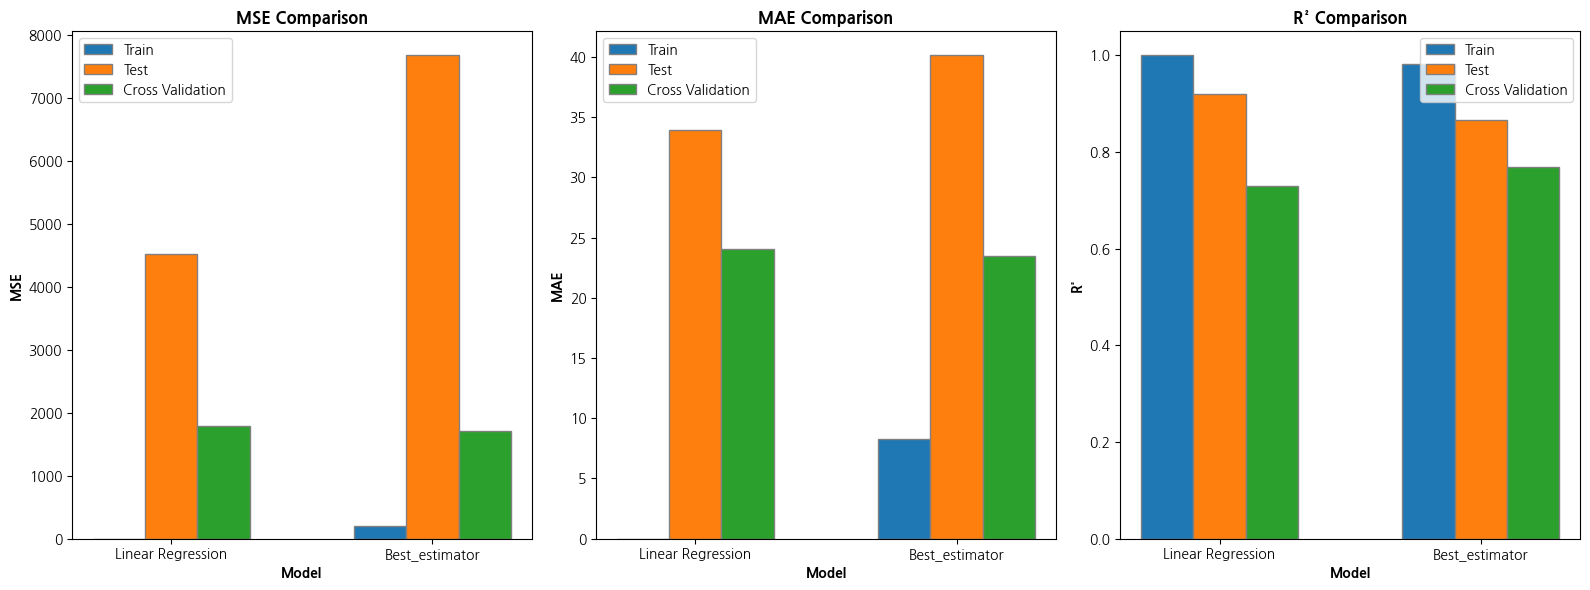

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {
    'Model': ['Linear Regression', 'Linear Regression', 'Best_estimator', 'Best_estimator', 'Linear Regression', 'Best_estimator'],
    'Data': ['Train', 'Test', 'Train', 'Test', 'Cross Validation', 'Cross Validation'],
    'MSE': [0.000002, 4516.477970, 205.426726, 7674.885477, 1783.123574, 1708.675202],
    'MAE': [0.000970, 33.911430, 8.244508, 40.114066, 24.047939, 23.446047],
    'R^2': [1.000000, 0.921121, 0.981405, 0.865966, 0.730010, 0.769462]
}

results = pd.DataFrame(data)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  

plt.figure(figsize=(16, 6))

barWidth = 0.2
models = ['Linear Regression', 'Best_estimator']
metrics = ['Train', 'Test', 'Cross Validation']


plt.subplot(1, 3, 1)
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * barWidth, results[results['Data'] == metric]['MSE'], width=barWidth, edgecolor='grey', label=metric)

plt.xlabel('Model', fontweight='bold')
plt.ylabel('MSE', fontweight='bold')
plt.xticks(np.arange(len(models)) + barWidth, models)
plt.title('MSE Comparison', fontweight='bold')
plt.legend()


plt.subplot(1, 3, 2)
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * barWidth, results[results['Data'] == metric]['MAE'], width=barWidth, edgecolor='grey', label=metric)

plt.xlabel('Model', fontweight='bold')
plt.ylabel('MAE', fontweight='bold')
plt.xticks(np.arange(len(models)) + barWidth, models)
plt.title('MAE Comparison', fontweight='bold')
plt.legend()

plt.subplot(1, 3, 3)
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * barWidth, results[results['Data'] == metric]['R^2'], width=barWidth, edgecolor='grey', label=metric)

plt.xlabel('Model', fontweight='bold')
plt.ylabel('R²', fontweight='bold')
plt.xticks(np.arange(len(models)) + barWidth, models)
plt.title('R² Comparison', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()
